In [1]:
%matplotlib inline

# Project Voxelwise Statistics onto Cortical Flat Maps

<big>This notebook includes code and instructions to re-generate figures included in the Data Descriptor article for the CNeuroMod-THINGS dataset. These figures feature **voxelwise statistics projected onto subject-specific cortical flat maps with Pycortex**. Scores include noise ceilings, average TSNR and t-scores from contrasts between memory conditions.</big>

<br/>

**The code below generates the following figures and sub-figures from the datapaper:**

* **Fig. 2a (left)**, voxelwise noise ceilings derived from beta scores estimated with GLMsingle from BOLD data from the THINGS task
* **Fig. 2a (right)**, TSNR scores for the THINGS task averaged across runs
* **Extra (not in paper)**, TSNR scores for the fLoc and retinotopy tasks, both averaged across runs
* **Fig. 4b**, t-scores contrasting beta scores between hit and correction rejection trials during the THINGS task

<br/>

---

# 0 | Installation

### Note:
If you are following these instructions on Github, we recommend that you view this Notebook through [https://nbviewer.org](https://nbviewer.org/github/courtois-neuromod/cneuromod-things/blob/main/datapaper/notebooks/brain_flatmaps.ipynb) for a more accurate rendering and improved readability. 

### 0.1 | Install the CNeuroMod-THINGS dataset

To generate figures, you need to download files from the CNeuroMod-THINGS dataset. 

Use the DataLad software (version > 1.0.0, https://www.datalad.org/) to clone the `cneuromod-things` repository. 
DataLad is a versionning tool to manage large data structures organized in git repositories available for Linux, OSX and Windows. 

Note: the command below installs **symbolic links without downloading heavy files** onto your local machine.

```bash
datalad clone git@github.com:courtois-neuromod/cneuromod-things.git
```
<br/>

---


### 0.2 | Pull anatomical files to generate cortical flat maps

To make cortical flat maps, you need to **download anatomical files** onto your local machine. 

Inside the newly cloned `cneuromod-things` repository, navigate to `cneuromod-things/anatomical/smriprep`, which is a submodule inside the main repository. Upon installation, the `smriprep` submodule will appear empty. 

```bash
cd cneuromod-things/anatomical/smriprep
ls
```
<br/>

Use DataLad to download the `smriprep` submodule's symbolic links (**no large files will be pulled**).
```bash
datalad get *
ls
```
<br/>

Inside `smriprep`, navigate to the `freesurfer` sub-submodule (`cneuromod-things/anatomical/smriprep/sourcedata/freesurfer`), and download its content to your local machine.

```bash
cd sourcedata/freesurfer
datalad get *    # Downloads symbolic links
datalad get *    # Downloads files locally (warning: this step may take several minutes)
```
<br/>

Then, navigate to a different submodule, `cneuromod-things/anatomical/pycortex`, and download its files locally too.

```bash
cd ../../../pycortex
datalad get *    # Downloads symbolic links
datalad get *    # Downloads files locally (warning: may take several minutes)
```
<br/>

---

### 0.3 | Pull results files to project onto the brain

To project voxelwise statistics onto cortical flat maps, you also need to **download results files** onto your local machine. 

#### Noise Ceilings:
Navigate to the `cneuromod-things/THINGS/glmsingle` submodule, and download its symbolic links. 

```bash
cd ../../THINGS/glmsingle
datalad get *    # Downloads symbolic links
```
<br/>
Then, use DataLad to download the noise ceiling volume files onto your local machine.

```bash
datalad get sub-*/glmsingle/output/sub-*_task-things_space-T1w_model-fitHrfGLMdenoiseRR_stat-noiseCeilings_statmap.nii.gz
```
<br/>

#### Average TSNR:
Navigate to the `cneuromod-things/THINGS/tsnr` submodule, download its symbolic links, then download each subject's average TSNR map locally (THINGS task).

```bash
cd ../tsnr
datalad get *    # Downloads symbolic links
datalad get sub-*/sub-*_task-things_space-T1w_stat-avgtsnr_statmap.nii.gz    # Downloads files locally
```
<br/>

Navigate to the `cneuromod-things/fLoc/tsnr` submodule, download its symbolic links, then download each subject's average TSNR map locally (fLoc task).

```bash
cd ../../fLoc/tsnr
datalad get *    # Downloads symbolic links
datalad get sub-*/sub-*_task-floc_space-T1w_stat-avgtsnr_statmap.nii.gz    # Downloads files locally
```
<br/>

Navigate to the `cneuromod-things/retinotopy/tsnr` submodule, download its symbolic links, then download each subject's average TSNR map locally (retinotopy task).

```bash
cd ../../retinotopy/tsnr
datalad get *    # Downloads symbolic links
datalad get sub-*/sub-*_task-retinotopy_space-T1w_stat-avgtsnr_statmap.nii.gz    # Downloads files locally
```
<br/>

#### Memory t-scores:
Lastly, navigate to the `cneuromod-things/THINGS/glm-memory` submodule, download its symbolic links, then pull t-score maps of contrasts between hit and correct rejections trials from the THINGS memory task.
```bash
cd ../../THINGS/glm-memory
datalad get *    # Downloads symbolic links
datalad get sub-*/glm/sub-*_task-things_space-T1w_contrast-*_stat-*_desc-fromBetas_statmap.nii.gz    # Downloads files
```
<br/>

---
### 0.4 | Install Pycortex 

If you wish to use the ``cneuromod-things/anatomical/pycortex`` dataset to visualize CNeuroMod data onto subject-specific flat maps, you need to install [Freesurfer](https://surfer.nmr.mgh.harvard.edu/fswiki/DownloadAndInstall) (recommended version: 7.3.2), [Inkscape](https://inkscape.org/) (version >= 1.1.2) and Pycortex.

To install Pycortex, follow the steps below.
(Adapted from: [https://github.com/gallantlab/pycortex](https://github.com/gallantlab/pycortex))

```bash
# First, install some required dependencies (if not already installed)
$ pip install -U setuptools wheel cython
# Install pycortex and other required libraries from pip
$ pip install numpy==1.24.4
$ pip install -U pycortex==1.2.11
$ pip install nibabel==5.2.1
$ pip install nilearn==0.10.4
```
<br/>

Install ``ipython`` to help configure pycortex and test your installation
```bash
$ pip install ipython==8.7.0
```
<br/>

In ipython, import pycortex and print the location of the pycortex ``config`` file.

```bash
$ ipython
In [1]: import cortex
In [2]: cortex.options.usercfg
```
<br/>

Also print the location of the default pycortex ``filestore`` (the database, analogous to Freesurfer's ``SUBJECTS_DIR``). This is where Pycortex looks for subjects files like maps and transformations.
```bash
$ ipython
In [3]: cortex.database.default_filestore
```
<br/>

**Important: Edit the config file manually** to replace the file store's default path with the absolute path to ``cneuromod-things/anatomical/pycortex/db``.\
E.g., Replace
```bash
filestore = build/bdist.linux-x86_64/wheel/pycortex-1.2.2.data/data/share/pycortex/db
```
<br/>

With:
```bash
filestore = /abs/path/to/cneuromod-things/anatomical/pycortex/db
```
<br/>

Also replace the relative path of the default color map with its absolute path.\
E.g., if you installed Pycortex in a virtual env, replace:
```bash
colormaps = build/bdist.linux-x86_64/wheel/pycortex-1.2.2.data/data/share/pycortex/colormaps
```
<br/>

With:
```bash
colormaps = /abs/path/to/my/pycortex_venv/share/pycortex/colormaps
```
<br/>

Test your pycortex installation by running the following code in ipython:
```bash
$ SUBJECTS_DIR="path/to/cneuromod-things/anatomical/smriprep/sourcedata/freesurfer"
$ ipython
In [1]: import cortex
In [2]: import nibabel as nib
In [3]: import numpy as np

In [4]: pycortex_db_dir = 'path/to/cneuromod-things/anatomical/pycortex/db'

In [5]: s = '01'
In [6]: vol = f'{pycortex_db_dir}/sub-{s}/transforms/align_auto_ref/ref.nii.gz'
In [7]: vol_arr = np.swapaxes(nib.load(vol).get_fdata(), 0, -1)
In [8]: cmap = 'Retinotopy_RYBCR' # try others?
In [9]: surf_vol = cortex.Volume(vol_arr, f'sub-{s}', 'align_auto', vmin=np.nanmin(vol_arr), vmax=np.nanmax(vol_arr), cmap=cmap)

In [10]: cortex.webshow(surf_vol, recache=True)
```
<br/>

A window should open in your default web browser featuring a placeholder EPI volume projected on sub-01's surface map.

---
### 0.5 | Install other Python libraries

To re-create figures inside this Notebook, you also need to install the following Python libraries (e.g., inside a virtual environment). 

```shell
matplotlib==3.7.5
jupyterlab==4.3.8
```


---
### 0.6 | Launch the current Jupyter Notebook

Inside `cneuromod-things`, navigate to the tutorial section, and open the current Notebook (brain_flatmaps.ipynb, e.g., inside jupyterlab)
```bash
cd cneuromod-things/datapaper/notebooks
jupyter lab
```


---
# 1 | Import Python libraries

Run the code below to import Python libraries.

In [2]:
import os
from pathlib import Path

import cortex
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt 

import nilearn
from nilearn.image import smooth_img

print("cortex", cortex.__version__)
print("nibabel", nib.__version__)
print("nilearn", nilearn.__version__)
print("numpy", np.__version__)
import matplotlib
print('matplotlib version: ', matplotlib.__version__)

cortex 1.2.11
nibabel 5.2.1
nilearn 0.10.4
numpy 1.24.4
matplotlib version:  3.7.5


---
# 2 | Noise Ceilings Flat Maps (Figure 2a, left)

**Fig. 2a (left)** features voxelwise noice ceilings computed from the main THINGS memory task, and projected onto subject-specific cortical flat maps.


**Input files**: 
* cneuromod-things/THINGS/glmsingle/sub-{s_num}/glmsingle/output/sub-{s_num}_task-things_space-T1w_model-fitHrfGLMdenoiseRR_stat-noiseCeilings_statmap.nii.gz


### 2.1 | Set paths and variables

In [3]:
#################################
# set save_fig to True to export 
# .png files of Fig. 2a (left)
#################################
save_fig = False

##################################################
# Select subject number: "01", "02", "03" or "06"
##################################################
s = "03"


##################################################
# Set w_ROIS to True to display hand-drawn ROIS
# set to True for the paper
##################################################
w_ROIS = True


##################################################
# Set w_cbar to True to display color bar 
# Default is False; 
# Added separately to paper's final composite fig
##################################################
w_cbar = False


##################################################
# Set the range of noise ceiling values to display
##################################################
# Lower threshold (set to 0.0 in the paper)
nc_lowthresh = 0.0
# Upper threshold (set to 35 in the paper)
nc_hithresh = 35


################################################################################
# Resolve relative paths (nothing to change below this point)

# set Freesufer variable SUBJECTS_DIR to "path/to/cneuromod-things/anatomical/smriprep/sourcedata/freesurfer"
fs_path = f'{Path("../../anatomical/smriprep/sourcedata/freesurfer").resolve()}'
os.environ['SUBJECTS_DIR'] = fs_path

# Set input and output paths
ns_path = Path("../../THINGS/glmsingle").resolve()
fig_save_path = Path("../figures").resolve()


### 2.2 | Run the code below to generate Fig. 2a (left)

Generates noise-ceiling cortical flat map for a given subject

Background RRGGBBAA: ffffff00
Area 0:0:2334.91:1024 exported to 2335 x 1024 pixels (96 dpi)


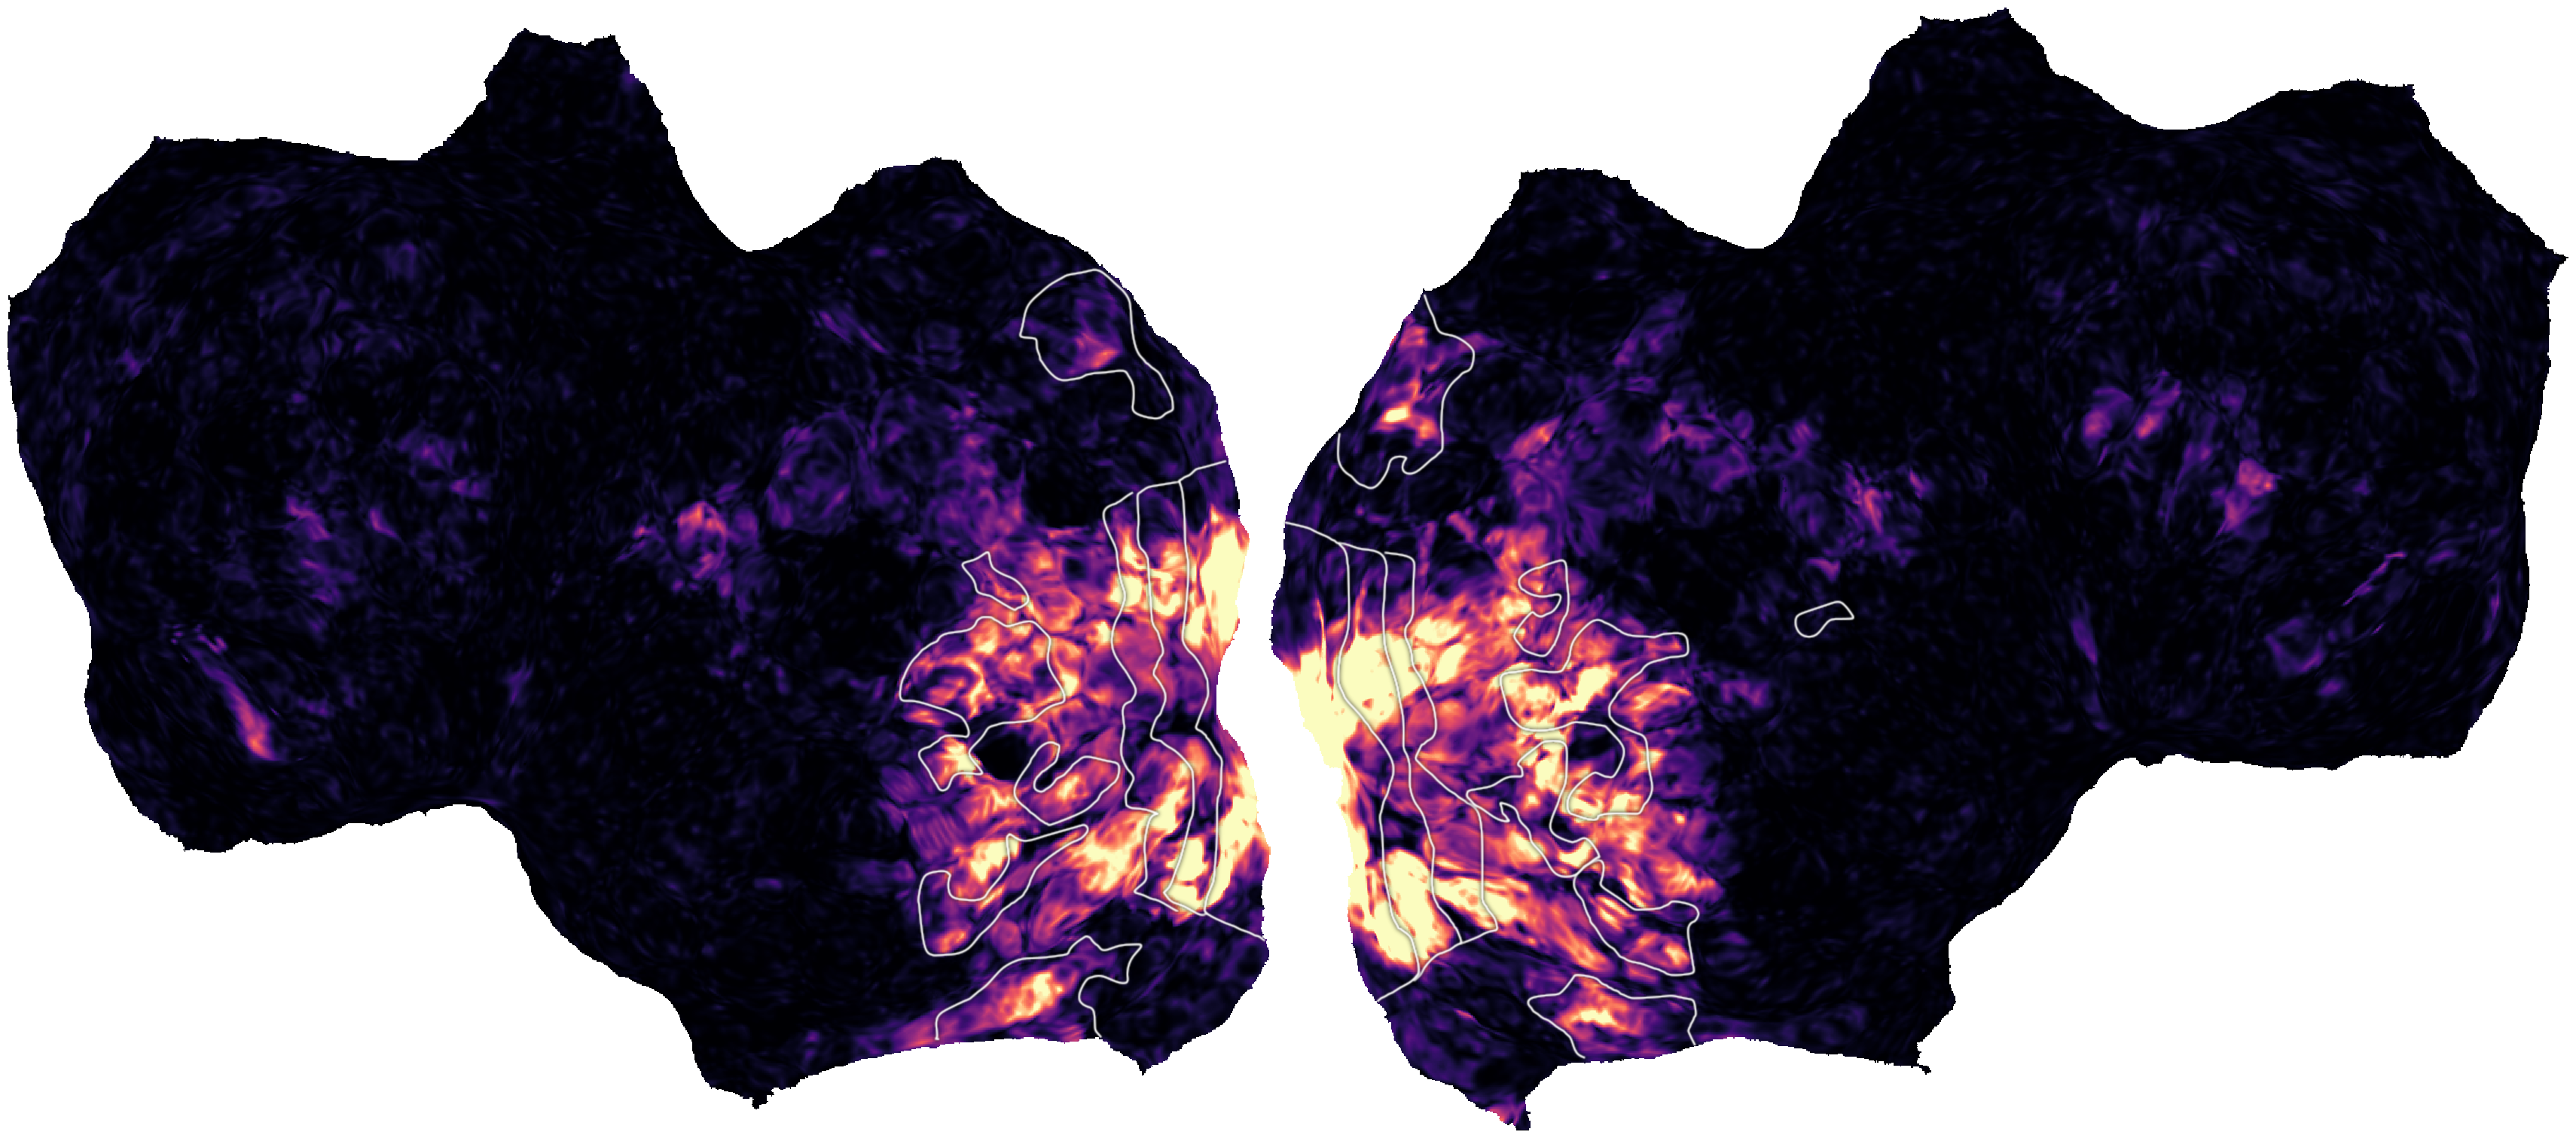

In [4]:

ns = f"{ns_path}/sub-{s}/glmsingle/output/sub-{s}_task-things_space-T1w_model-fitHrfGLMdenoiseRR_stat-noiseCeilings_statmap.nii.gz"
ns_arr = np.swapaxes(nib.load(ns).get_fdata(), 0, -1)

# Voxel vals need to be replaced by NaN to be transparent
ns_arr[ns_arr < nc_lowthresh] = np.nan
my_vol = cortex.Volume(
    ns_arr,
    f'sub-{s}',
    'align_auto',
    vmin=int(nc_lowthresh),
    vmax=int(nc_hithresh),
    cmap='magma',
)

fig = plt.figure(figsize=(34,20))

if w_cbar:
    cortex.quickshow(
        my_vol,
        pixelwise=True,
        colorbar_location='left',
        nanmean=True,
        with_curvature=True,
        sampler='trilinear',
        with_labels=False,
        with_rois=w_ROIS,
        curv_brightness=1.0,
        dpi=300, 
        fig=fig,
    )
    
    if save_fig:
        fig.savefig(f'{fig_save_path}/sub-{s}_noiseCeil_desc-wCbar_flatmap.png', dpi=300)

else:
    cortex.quickshow(
        my_vol,
        pixelwise=True,
        with_colorbar=False,
        nanmean=True,
        with_curvature=True,
        sampler='trilinear',
        with_labels=False,
        with_rois=w_ROIS,
        curv_brightness=1.0,
        dpi=300, 
        fig=fig,
    )
    
    if save_fig:
        fig.savefig(f'{fig_save_path}/sub-{s}_noiseCeil_flatmap.png', dpi=300)


### 2.3 | View Noise Ceiling Flat Maps in Pycortex GUI

This code snipet demonstrates how to visualize noise ceilings on flatmaps directly in the interactive Pycortex GUI.

##### Note: 
The code should open a separate window in your default web browser


In [5]:
# set subject number: "01", "02", "03" or "06"
s = "01"

# Load noise ceilings
ns = f"{ns_path}/sub-{s}/glmsingle/output/sub-{s}_task-things_space-T1w_model-fitHrfGLMdenoiseRR_stat-noiseCeilings_statmap.nii.gz"
ns_arr = np.swapaxes(nib.load(ns).get_fdata(), 0, -1)

# Set threshold manually
# pick threshold, and replace below-threshold values by NaN
nc_thresh = 0.0
ns_arr[ns_arr < nc_thresh] = np.nan

# Project noise ceiling array (volume) to Pycortex surface
my_vol = cortex.Volume(ns_arr, f'sub-{s}', 'align_auto', vmin=0, vmax=35, cmap='magma')
    
cortex.webshow(my_vol, recache=True)


Generating new ctm file...
wm
wm
inflated
inflated
Started server on port 21901
Stopping server


<JS: window.viewer>

---
# 3 | Average TSNR Flat Maps (Figure 2a, right)

**Fig. 2a (right)** features TSNR scores averaged across runs for the main THINGS memory task, and projected onto subject-specific cortical flat maps. The code below can be used to re-create this figure. Alternatively, it can be used to visualize average TSNR scores for fLoc and retinotopy, the two vision localizer tasks (sub-01, sub-02 and sub-03 only). 


**Input files**: 
* cneuromod-things/THINGS/tsnr/sub-{s_num}/sub-{s_num}_task-things_space-T1w_stat-avgtsnr_statmap.nii.gz
* cneuromod-things/fLoc/tsnr/sub-{s_num}/sub-{s_num}_task-floc_space-T1w_stat-avgtsnr_statmap.nii.gz
* cneuromod-things/retinotopy/tsnr/sub-{s_num}/sub-{s_num}_task-retinotopy_space-T1w_stat-avgtsnr_statmap.nii.gz


### 3.1 | Set paths and variables

In [6]:
#################################
# set save_fig to True to export 
# .png files of Fig. 2a (right)
#################################
save_fig = False

######################
# Choose the fMRI task
######################
# things
# floc
# retinotopy
task = "things"  # select : retinotopy, floc, things


##################################################
# Select subject number: "01", "02", "03" or "06"
# NOTE:
# sub-06 did not complete fLoc or retinotopy
##################################################
s = "03"


##################################################
# Set w_ROIS to True to display hand-drawn ROIS
# set to True for the paper
##################################################
w_ROIS = True


##################################################
# Set w_cbar to True to display color bar 
# Default is False; 
# Added separately to paper's final composite fig
##################################################
w_cbar = False

#########################################
# Set the range of TSNR scores to display
#########################################
# Lower threshold (set to 0.0 in the paper)
tsnr_lothresh = 0.0
# Upper threshold (set to 110 in the paper)
tsnr_hithresh = 110


###########################################################################################
# Resolve relative paths (nothing to change below this point)

# set Freesufer variable SUBJECTS_DIR to "path/to/cneuromod-things/anatomical/smriprep/sourcedata/freesurfer"
fs_path = f'{Path("../../anatomical/smriprep/sourcedata/freesurfer").resolve()}'
os.environ['SUBJECTS_DIR'] = fs_path

# Set input and output paths
if task == "things":
    tsnr_path = Path("../../THINGS/tsnr").resolve()
elif task == "floc":
    tsnr_path = Path("../../fLoc/tsnr").resolve()
elif task == "retinotopy":
    tsnr_path = Path("../../retinotopy/tsnr").resolve()
else:
    print(f"There are no TSNR maps for task {task}")

fig_save_path = Path("../figures").resolve()

### 3.2 | Run the code below to generate Fig. 2a (right)

Generates TSNR cortical flat map for a given subject

Background RRGGBBAA: ffffff00
Area 0:0:2334.91:1024 exported to 2335 x 1024 pixels (96 dpi)


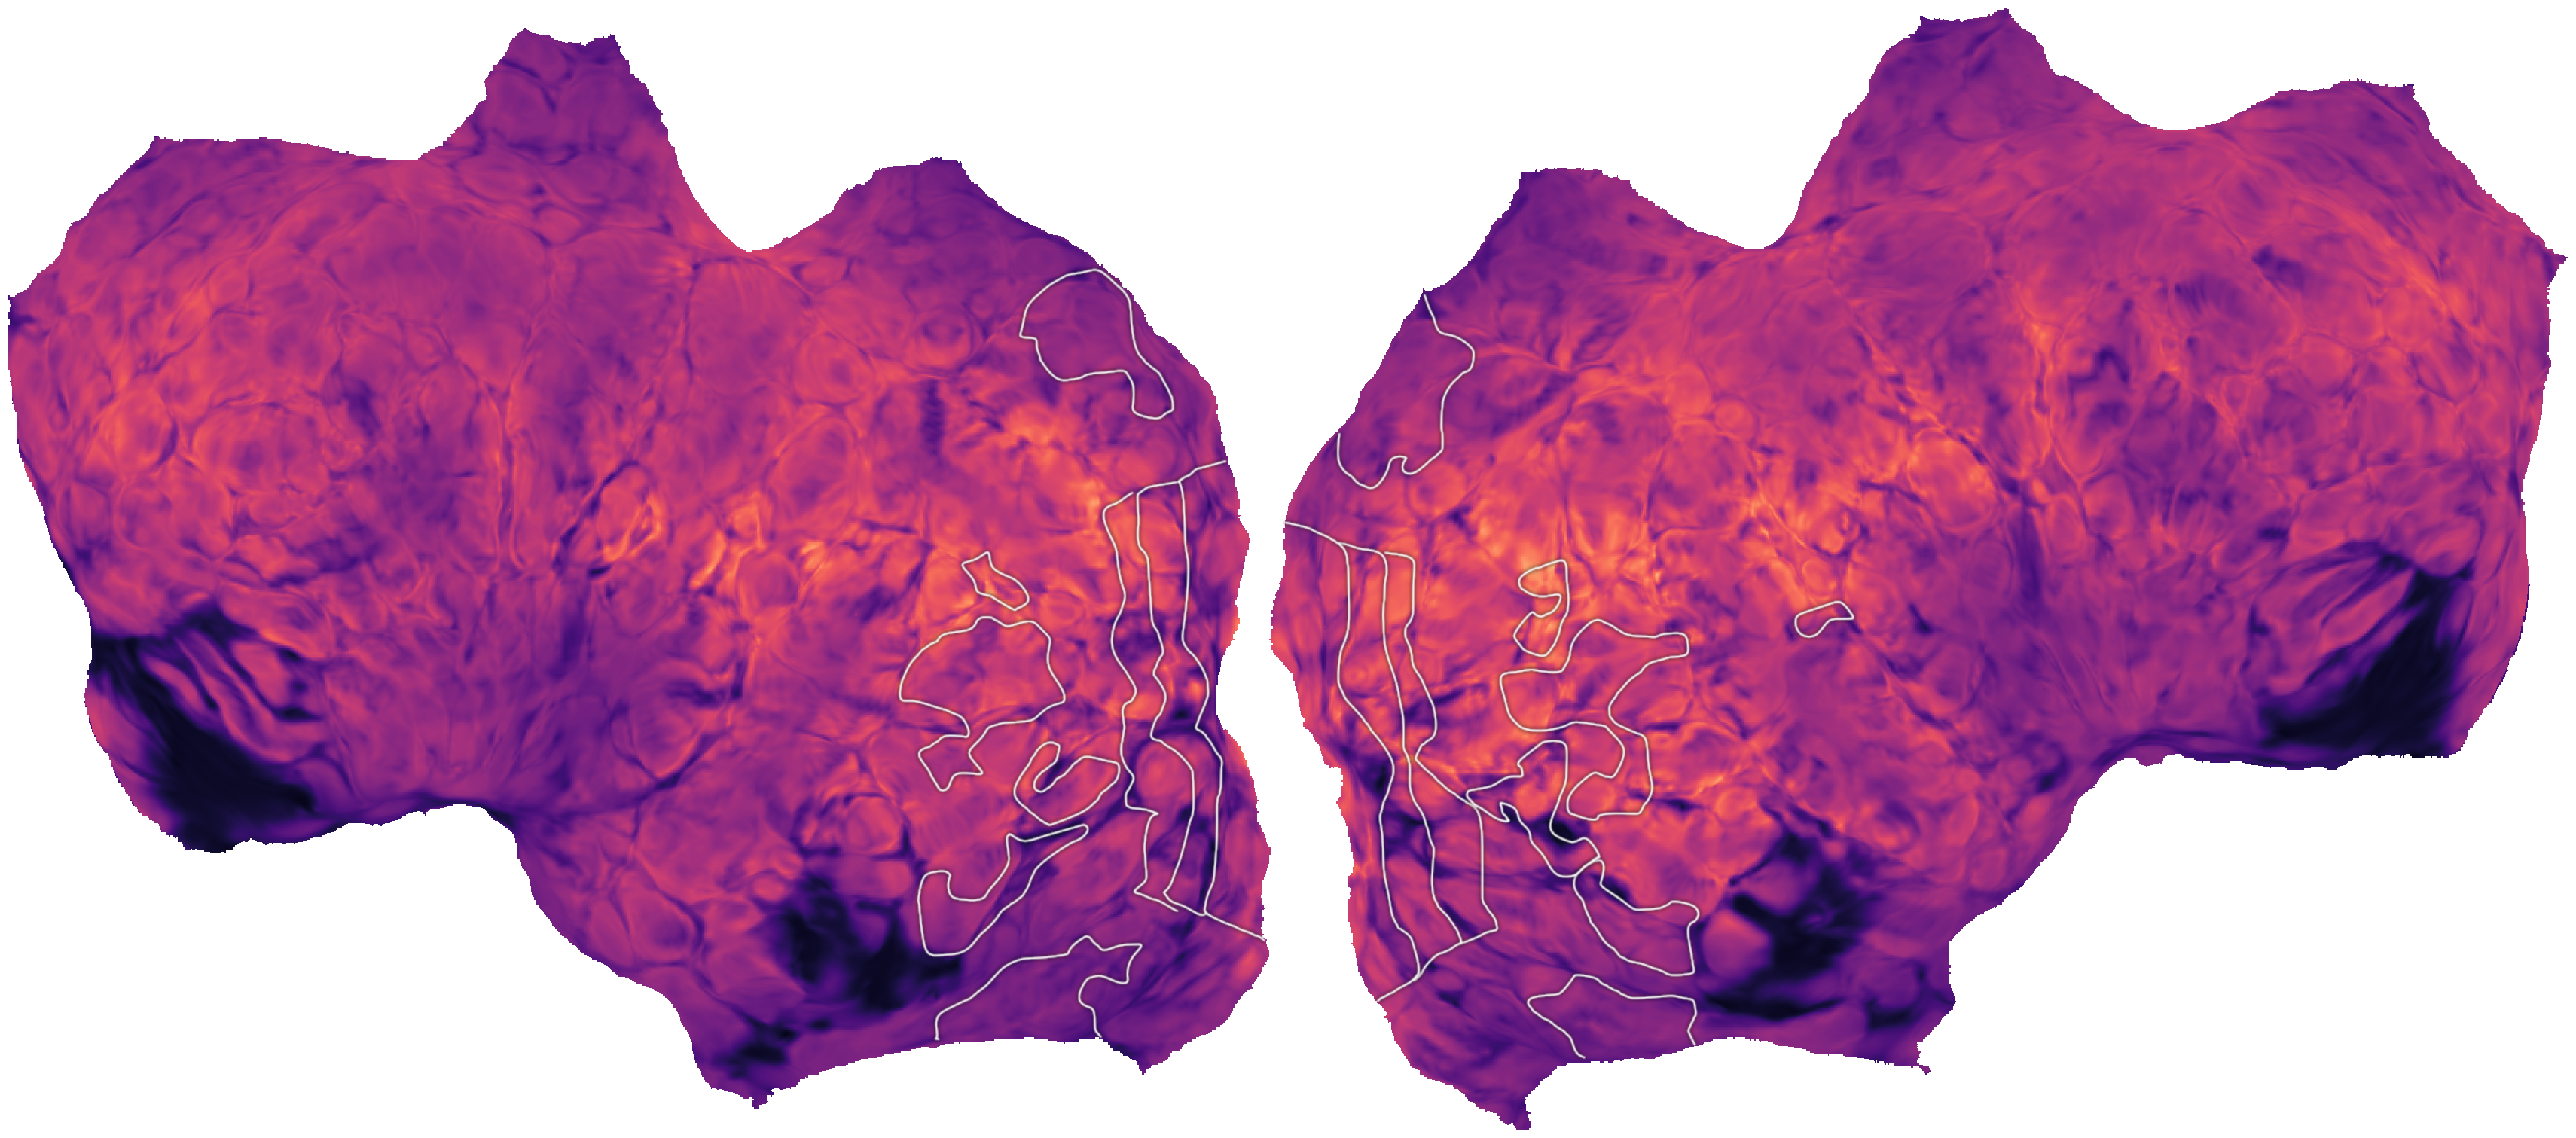

In [7]:
tsnr_fpath = f"{tsnr_path}/sub-{s}/sub-{s}_task-{task}_space-T1w_stat-avgtsnr_statmap.nii.gz"

if not Path(tsnr_fpath).exists():
    print(f"no data file found for sub-{s} for the {task} task")

else:
    tsnr_arr = np.swapaxes(nib.load(tsnr_fpath).get_fdata(), 0, -1)    

    # Voxel vals need to be replaced by NaN to be transparent
    tsnr_arr[tsnr_arr < tsnr_lothresh] = np.nan
    
    my_vol = cortex.Volume(
        tsnr_arr,
        f'sub-{s}',
        'align_auto',
        vmin=int(tsnr_lothresh),
        vmax=int(tsnr_hithresh),
        cmap='magma',
    )

    fig = plt.figure(figsize=(34,20))

    if w_cbar:
        cortex.quickshow(
            my_vol,
            pixelwise=True,
            colorbar_location='left',
            nanmean=True,
            with_curvature=True,
            sampler='trilinear',
            with_labels=False,
            with_rois=w_ROIS,
            curv_brightness=1.0,
            dpi=300, 
            fig=fig,
        )
        
        if save_fig:
            fig.savefig(f'{fig_save_path}/sub-{s}_task-{task}_tsnr_desc-wCbar_flatmap.png', dpi=300)
                
    else:
        cortex.quickshow(
            my_vol,
            pixelwise=True,
            with_colorbar=False,
            nanmean=True,
            with_curvature=True,
            sampler='trilinear',
            with_labels=False,
            with_rois=w_ROIS,
            curv_brightness=1.0,
            dpi=300, 
            fig=fig,
        )
    
        if save_fig:
            fig.savefig(f'{fig_save_path}/sub-{s}_task-{task}_tsnr_flatmap.png', dpi=300)

---
# 4 | T-value Flat Maps for Contrasts Between Memory Conditions (Figure 4b)

**Fig. 4b** features the results (t-scores) of contrasts between hit and correct rejection trials for the THINGS memory task projected onto subject-specific cortical flat maps. 


**Input files**: 
* cneuromod-things/THINGS/glm-memory/sub-{s_num}/glm/sub-{s_num}_task-things_space-T1w_contrast-{HitvCorrectRej, HitWithinvCorrectRej, HitBtwnvCorrectRej}_stat-{t, p}_desc-fromBetas_statmap.nii.gz


### 4.1 | Set paths and variables

In [8]:
#################################
# set save_fig to True to  
# export .png files of Fig. 4b 
#################################
save_fig = False

################################
# Select which contrast to display
# HitvCorrectRej : 
#       All hits versus all correct rejections (not featured in the paper)
# HitWithinvCorrectRej : 
#       Hits for within-session image repeats (short delay), versus all correct rejections
# HitBtwnvCorrectRej : 
#       Hits for between-session image repeats (long delay), versus all correct rejections
################################
contrast = "HitvCorrectRej" # choose from: [HitvCorrectRej, HitWithinvCorrectRej, HitBtwnvCorrectRej]


##################################################
# Select subject number: "01", "02", "03" or "06"
##################################################
s = "03"


##################################################
# Set w_ROIS to True to display hand-drawn ROIS
# set to True for the paper
##################################################
w_ROIS = True


##################################################
# Set w_cbar to True to display color bar 
# Default is False; 
# Added separately to paper's final composite fig
##################################################
w_cbar = False

##################################################
# set the p value threshold (uncorrected)
# set to 0.0001 in the paper
##################################################
p_thresh = 0.0001


##############################################################################
# Resolve relative paths (nothing to change below this point)

# set Freesufer variable SUBJECTS_DIR to "path/to/cneuromod-things/anatomical/smriprep/sourcedata/freesurfer"
fs_path = f'{Path("../../anatomical/smriprep/sourcedata/freesurfer").resolve()}'
os.environ['SUBJECTS_DIR'] = fs_path

# Set input and output paths
glm_path = Path("../../THINGS/glm-memory").resolve()
fig_save_path = Path("../figures").resolve()


### 4.2 | Run the code below to generate Fig. 4b

Generates t-score cortical flat map for a given subject

Background RRGGBBAA: ffffff00
Area 0:0:2334.91:1024 exported to 2335 x 1024 pixels (96 dpi)


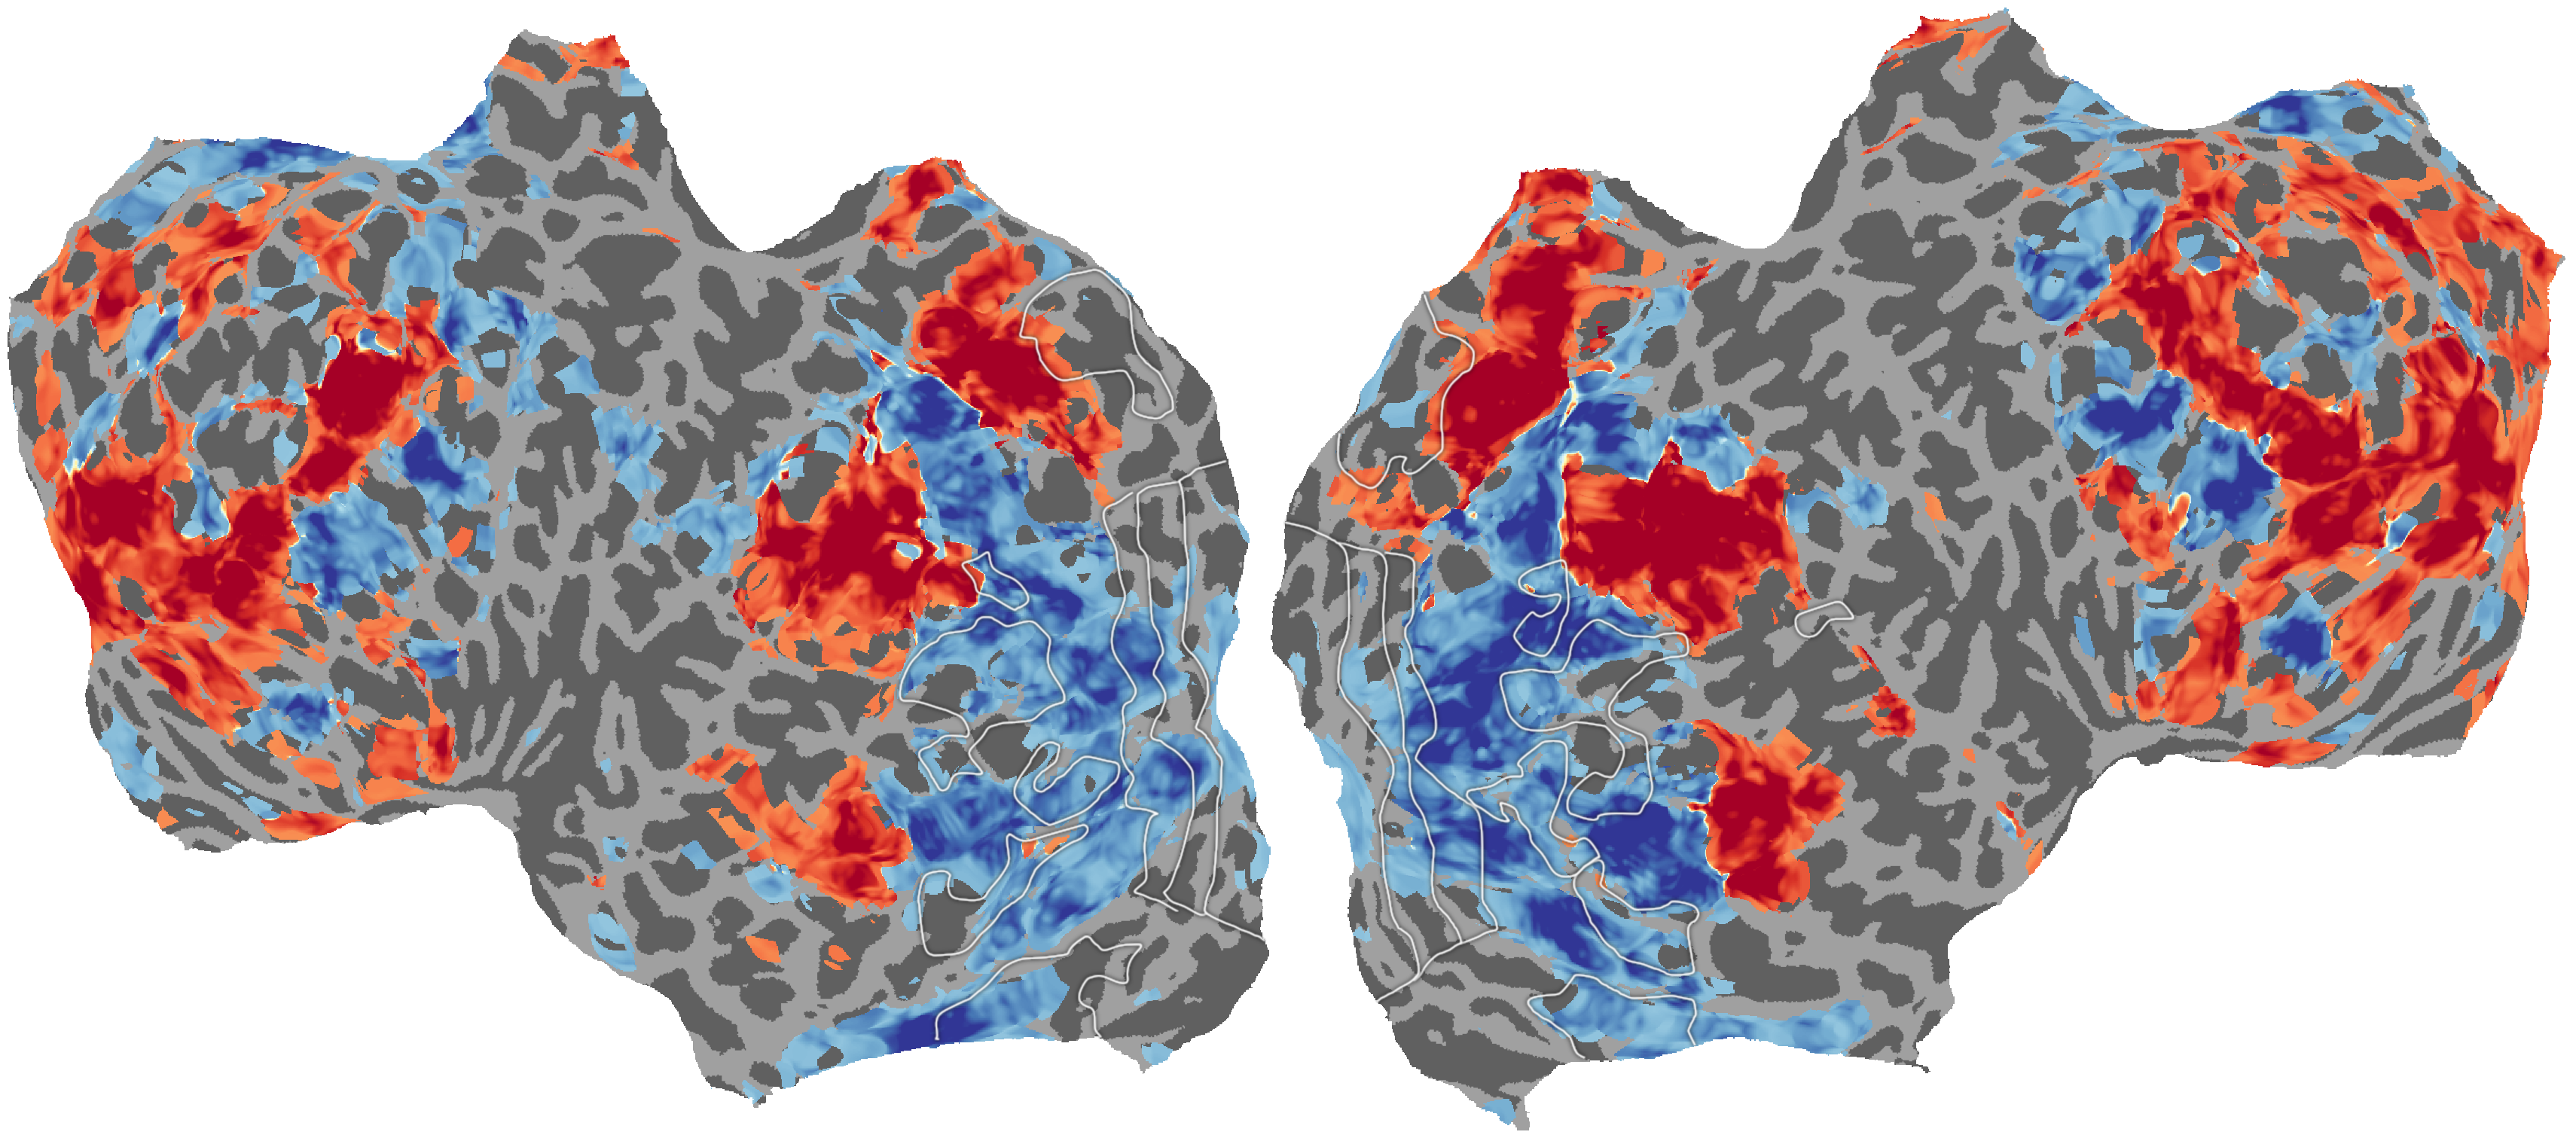

In [9]:
    
vals_path = f"{glm_path}/sub-{s}/glm/sub-{s}_task-things_space-T1w_contrast-{contrast}_stat-t_desc-fromBetas_statmap.nii.gz"
vals_arr = np.swapaxes(nib.load(vals_path).get_fdata(), 0, -1)

p_path = f"{glm_path}/sub-{s}/glm/sub-{s}_task-things_space-T1w_contrast-{contrast}_stat-p_desc-fromBetas_statmap.nii.gz"
p_arr = np.swapaxes(nib.load(p_path).get_fdata(), 0, -1)

# find t-score cutoff for p < threshold, e.g., 0.0001
t_min = np.min(np.absolute(vals_arr[np.logical_and(p_arr < p_thresh, vals_arr!= 0.0)]))

# re-load t-scores but apply light smoothing to remove very small clusters in unsmoothed stats map
vals_arr = np.swapaxes(smooth_img(nib.load(vals_path), fwhm=3).get_fdata(), 0, -1)

# mask t scores with below-threshold p-values
vals_arr[np.absolute(vals_arr) < t_min] = np.nan

my_vol = cortex.Volume(
    vals_arr,
    f'sub-{s}',
    'align_auto',
    vmin=-8,
    vmax=8,
    cmap='RdYlBu_r', # RdBu, RdYlBu, Spectral_r, coolwarm
)

fig = plt.figure(figsize=(34,20))

if w_cbar:
    cortex.quickshow(
        my_vol,
        pixelwise=True,
        colorbar_location='left',
        nanmean=True,
        with_curvature=True,
        sampler='trilinear', 
        with_labels=False,
        with_rois=w_ROIS,
        curv_brightness=1.0,
        dpi=300, 
        fig=fig,
    )
    
    if save_fig:
        fig.savefig(f'{fig_save_path}/sub-{s}_glmMemo_contrast-{contrast}_desc-wCbar_flatmap.png', dpi=300)
    
else:
    cortex.quickshow(
        my_vol,
        pixelwise=True,
        with_colorbar=False,
        nanmean=True,
        with_curvature=True,
        sampler='trilinear', 
        with_labels=False,
        with_rois=w_ROIS,
        curv_brightness=1.0,
        dpi=300, 
        fig=fig,
    )
    
    if save_fig:
        fig.savefig(f'{fig_save_path}/sub-{s}_glmMemo_contrast-{contrast}_flatmap.png', dpi=300)
